In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
### Create the Bidirectional LSTM model
from random import random
from numpy import array
from numpy import cumsum
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import pickle

In [3]:
df=pd.read_csv('train-2.csv',parse_dates=True)
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
df.shape

(1017209, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
df2=df.reindex(index=df.index[::-1])

In [8]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [9]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [10]:
atr2=df2[df2.Store==1097]

In [11]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1
1016076,1097,3,2013-01-02,6688,1819,1,0,0,1
1014961,1097,4,2013-01-03,7053,1803,1,0,0,1
1013846,1097,5,2013-01-04,6430,1799,1,0,0,1
1012731,1097,6,2013-01-05,5460,1390,1,0,0,0


In [12]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5556,1097,1,2015-07-27,10874,2357,1,1,0,1
4441,1097,2,2015-07-28,10225,2334,1,1,0,1
3326,1097,3,2015-07-29,10053,2296,1,1,0,1
2211,1097,4,2015-07-30,10324,2346,1,1,0,1
1096,1097,5,2015-07-31,11443,2451,1,1,0,1


In [13]:
atr2.shape

(942, 9)

In [14]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1017190 to 1096
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [15]:
atr2.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,942.0,942.000000,942.000000,942.000000,942.0,942.000000,942.000000
mean,1097.0,3.997877,9744.599788,2420.921444,1.0,0.382166,0.159236
std,0.0,1.998404,1900.891959,329.306198,0.0,0.486175,0.366090
min,1097.0,1.000000,5460.000000,1055.000000,1.0,0.000000,0.000000
25%,1097.0,2.000000,8486.250000,2245.750000,1.0,0.000000,0.000000
50%,1097.0,4.000000,9603.000000,2460.000000,1.0,0.000000,0.000000
75%,1097.0,6.000000,10768.750000,2619.000000,1.0,1.000000,0.000000
max,1097.0,7.000000,17039.000000,3804.000000,1.0,1.000000,1.000000


In [16]:
atr2.Sales.value_counts()

10690    3
10428    3
11166    3
11030    3
9861     3
        ..
9901     1
10185    1
10521    1
6835     1
11443    1
Name: Sales, Length: 870, dtype: int64

In [17]:
atr2=atr2.set_index('Date')

In [18]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1097,2,5961,1405,1,0,a,1
2013-01-02,1097,3,6688,1819,1,0,0,1
2013-01-03,1097,4,7053,1803,1,0,0,1
2013-01-04,1097,5,6430,1799,1,0,0,1
2013-01-05,1097,6,5460,1390,1,0,0,0


In [19]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [20]:
atr2.head()

,Sales
Date,
2013-01-01,5961
2013-01-02,6688
2013-01-03,7053
2013-01-04,6430
2013-01-05,5460


In [21]:
atr2.tail()

,Sales
Date,
2015-07-27,10874
2015-07-28,10225
2015-07-29,10053
2015-07-30,10324
2015-07-31,11443


<AxesSubplot:xlabel='Date'>

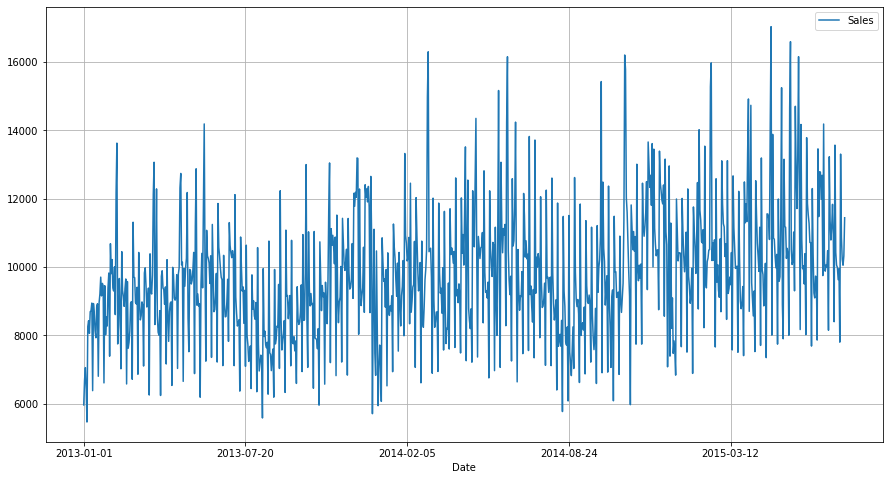

In [22]:
atr2.plot(figsize=(15,8), grid=True)

In [23]:
df1=atr2.reset_index()['Sales']

In [24]:
df1.shape

(942,)

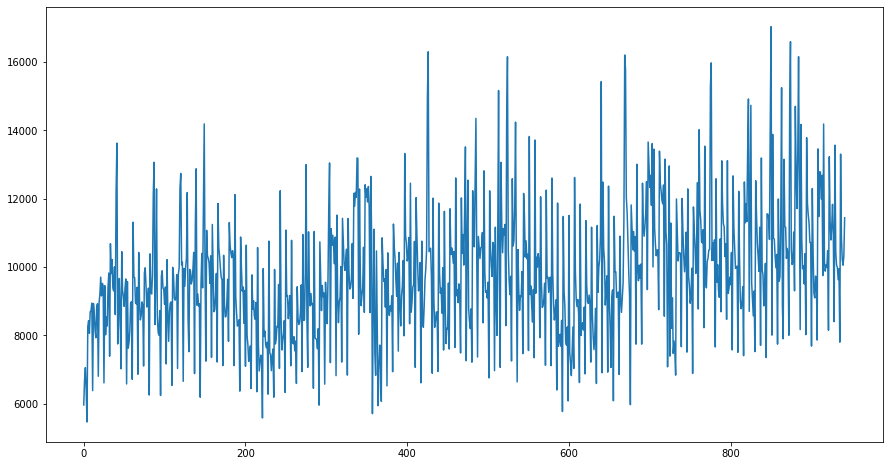

In [25]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1

array([[0.52163399],
       [0.55302703],
       [0.56878832],
       [0.54188617],
       [0.5       ],
       [0.62082218],
       [0.62807669],
       [0.61214267],
       [0.63951982],
       [0.64077209],
       [0.65044477],
       [0.53968391],
       [0.64984023],
       [0.63740392],
       [0.61564038],
       [0.60657224],
       [0.64569479],
       [0.64958114],
       [0.55786337],
       [0.65104931],
       [0.66210381],
       [0.6832628 ],
       [0.65951291],
       [0.67536057],
       [0.67255376],
       [0.54948614],
       [0.67238103],
       [0.61037223],
       [0.63282667],
       [0.62142672],
       [0.66970377],
       [0.6884446 ],
       [0.58329735],
       [0.72553761],
       [0.68762415],
       [0.70550134],
       [0.66957423],
       [0.66573106],
       [0.69621729],
       [0.63589256],
       [0.79005095],
       [0.85275067],
       [0.59875637],
       [0.62263581],
       [0.68153554],
       [0.64439934],
       [0.56732015],
       [0.715

In [28]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(612, 330)

In [30]:
print(train_data)
print('\n')
print(atr2.iloc[0:612]) #train

[[0.52163399]
 [0.55302703]
 [0.56878832]
 [0.54188617]
 [0.5       ]
 [0.62082218]
 [0.62807669]
 [0.61214267]
 [0.63951982]
 [0.64077209]
 [0.65044477]
 [0.53968391]
 [0.64984023]
 [0.63740392]
 [0.61564038]
 [0.60657224]
 [0.64569479]
 [0.64958114]
 [0.55786337]
 [0.65104931]
 [0.66210381]
 [0.6832628 ]
 [0.65951291]
 [0.67536057]
 [0.67255376]
 [0.54948614]
 [0.67238103]
 [0.61037223]
 [0.63282667]
 [0.62142672]
 [0.66970377]
 [0.6884446 ]
 [0.58329735]
 [0.72553761]
 [0.68762415]
 [0.70550134]
 [0.66957423]
 [0.66573106]
 [0.69621729]
 [0.63589256]
 [0.79005095]
 [0.85275067]
 [0.59875637]
 [0.62263581]
 [0.68153554]
 [0.64439934]
 [0.56732015]
 [0.71551947]
 [0.66668106]
 [0.65847655]
 [0.64629934]
 [0.66866742]
 [0.680931  ]
 [0.54814751]
 [0.67764919]
 [0.59344503]
 [0.60082909]
 [0.61499266]
 [0.65048795]
 [0.6522584 ]
 [0.55406339]
 [0.75269885]
 [0.68352189]
 [0.68248553]
 [0.65126522]
 [0.64936523]
 [0.67043786]
 [0.56045427]
 [0.71448312]
 [0.65186976]
 [0.62919941]
 [0.63

In [31]:
print(test_data)
print('\n')
print(atr2.iloc[612:])  #test

[[0.63662665]
 [0.55000432]
 [0.77571466]
 [0.60950859]
 [0.62203126]
 [0.62561534]
 [0.61641765]
 [0.64539252]
 [0.56084291]
 [0.75468521]
 [0.67259694]
 [0.6522584 ]
 [0.64996977]
 [0.66059245]
 [0.64880387]
 [0.57578375]
 [0.74639433]
 [0.63615165]
 [0.60791087]
 [0.59158822]
 [0.60955177]
 [0.6437948 ]
 [0.54875205]
 [0.74842387]
 [0.66404698]
 [0.69556957]
 [0.70524225]
 [0.73430348]
 [0.93060713]
 [0.56231108]
 [0.80348044]
 [0.71979446]
 [0.70295362]
 [0.64794024]
 [0.67242422]
 [0.68494689]
 [0.56313153]
 [0.79838501]
 [0.65066068]
 [0.61948355]
 [0.5690906 ]
 [0.65709474]
 [0.6670697 ]
 [0.52685897]
 [0.76021245]
 [0.69004232]
 [0.69004232]
 [0.65756974]
 [0.66067882]
 [0.66434925]
 [0.56028154]
 [0.73512393]
 [0.65476293]
 [0.63865619]
 [0.65726747]
 [0.67566284]
 [0.75533293]
 [0.96420244]
 [0.94589343]
 [0.78378962]
 [0.7650488 ]
 [0.72592625]
 [0.68943778]
 [0.65886519]
 [0.52193626]
 [0.77454875]
 [0.74591934]
 [0.71802401]
 [0.74099663]
 [0.71612402]
 [0.73460575]
 [0.59

In [32]:
len(train_data), len(test_data)

(612, 330)

In [33]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train)

[[0.52163399 0.55302703 0.56878832 ... 0.69129459 0.66957423 0.66737197]
 [0.55302703 0.56878832 0.54188617 ... 0.66957423 0.66737197 0.6489766 ]
 [0.56878832 0.54188617 0.5        ... 0.66737197 0.6489766  0.67086968]
 ...
 [0.56498834 0.74639433 0.65476293 ... 0.620304   0.56770878 0.80922359]
 [0.74639433 0.65476293 0.60955177 ... 0.56770878 0.80922359 0.68991277]
 [0.65476293 0.60955177 0.73780119 ... 0.80922359 0.68991277 0.65592884]]


In [36]:
print(y_train)

[0.6489766  0.67086968 0.57340876 0.70532861 0.6358062  0.60203817
 0.639563   0.65027204 0.65195613 0.5462907  0.69565593 0.68615597
 0.65679247 0.65411521 0.65839019 0.68624234 0.56779515 0.68719233
 0.69526729 0.79609638 0.81440539 0.69880819 0.70221954 0.55142931
 0.69410139 0.67177649 0.69522411 0.70714224 0.79026686 0.6310994
 0.58895414 0.69302185 0.69142413 0.6745833  0.67907419 0.69276276
 0.7145263  0.56123154 0.74799205 0.82027809 0.64776751 0.66201745
 0.64677433 0.64953796 0.53139304 0.67376285 0.71327403 0.66974696
 0.77079195 0.87701874 0.68999914 0.57699283 0.74246481 0.71003541
 0.7070127  0.70131272 0.6752742  0.71016495 0.58174281 0.74989205
 0.69755592 0.63951982 0.64219708 0.65955609 0.6879696  0.57587011
 0.77636238 0.72104672 0.70977632 0.69470593 0.6830469  0.68002418
 0.57133604 0.71081268 0.64858796 0.63295621 0.63364712 0.65217204
 0.68058554 0.60203817 0.75222385 0.7232058  0.71370585 0.70787633
 0.71677174 0.71059677 0.57129286 0.7875896  0.65817428 0.63770

In [37]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [39]:
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [40]:
X_train.shape

(511, 1, 100)

In [41]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
model=Sequential()
model.add(Bidirectional(LSTM(units=32, input_shape=(1,100), activation="relu")))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

2022-05-08 14:10:14.449813: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-08 14:10:14.451735: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 3s 6ms/sample - loss: 0.1195 - mape: 43.4624 - val_loss: 0.0649 - val_mape: 34.8508
Epoch 2/150
511/511 [==============================] - 0s 181us/sample - loss: 0.0169 - mape: 15.8217 - val_loss: 0.0185 - val_mape: 14.2954
Epoch 3/150
511/511 [==============================] - 0s 181us/sample - loss: 0.0118 - mape: 12.5002 - val_loss: 0.0102 - val_mape: 12.1553
Epoch 4/150
511/511 [==============================] - 0s 185us/sample - loss: 0.0090 - mape: 12.0917 - val_loss: 0.0080 - val_mape: 10.3389
Epoch 5/150
511/511 [==============================] - 0s 179us/sample - loss: 0.0070 - mape: 9.6525 - val_loss: 0.0076 - val_mape: 9.1400
Epoch 6/150
511/511 [==============================] - 0s 176us/sample - loss: 0.0063 - mape: 9.5026 - val_loss: 0.0083 - val_mape: 10.6424
Epoch 7/150
511/511 [==============================] - 0s 181us/sample - loss: 0.0060 - mape: 9.3780 - val_loss: 

511/511 [==============================] - 0s 166us/sample - loss: 0.0028 - mape: 5.7247 - val_loss: 0.0040 - val_mape: 6.3387
Epoch 60/150
511/511 [==============================] - 0s 162us/sample - loss: 0.0028 - mape: 5.7279 - val_loss: 0.0041 - val_mape: 6.3961
Epoch 61/150
511/511 [==============================] - 0s 157us/sample - loss: 0.0027 - mape: 5.6203 - val_loss: 0.0039 - val_mape: 6.0197
Epoch 62/150
511/511 [==============================] - 0s 167us/sample - loss: 0.0027 - mape: 5.5701 - val_loss: 0.0039 - val_mape: 6.1064
Epoch 63/150
511/511 [==============================] - 0s 168us/sample - loss: 0.0027 - mape: 5.5457 - val_loss: 0.0042 - val_mape: 6.6867
Epoch 64/150
511/511 [==============================] - 0s 164us/sample - loss: 0.0027 - mape: 5.6374 - val_loss: 0.0039 - val_mape: 6.1512
Epoch 65/150
511/511 [==============================] - 0s 166us/sample - loss: 0.0028 - mape: 5.8336 - val_loss: 0.0040 - val_mape: 6.2891
Epoch 66/150
511/511 [===========

511/511 [==============================] - 0s 162us/sample - loss: 0.0022 - mape: 4.9521 - val_loss: 0.0037 - val_mape: 5.6340
Epoch 118/150
511/511 [==============================] - 0s 167us/sample - loss: 0.0022 - mape: 4.9733 - val_loss: 0.0035 - val_mape: 5.4431
Epoch 119/150
511/511 [==============================] - 0s 166us/sample - loss: 0.0022 - mape: 4.9413 - val_loss: 0.0033 - val_mape: 5.3783
Epoch 120/150
511/511 [==============================] - 0s 165us/sample - loss: 0.0022 - mape: 4.8633 - val_loss: 0.0033 - val_mape: 5.3677
Epoch 121/150
511/511 [==============================] - 0s 165us/sample - loss: 0.0022 - mape: 4.9973 - val_loss: 0.0033 - val_mape: 5.3426
Epoch 122/150
511/511 [==============================] - 0s 167us/sample - loss: 0.0022 - mape: 4.9379 - val_loss: 0.0036 - val_mape: 5.5331
Epoch 123/150
511/511 [==============================] - 0s 168us/sample - loss: 0.0022 - mape: 4.9650 - val_loss: 0.0036 - val_mape: 5.5300
Epoch 124/150
511/511 [====

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  34048     
_________________________________________________________________
dense (Dense)                multiple                  520       
_________________________________________________________________
dense_1 (Dense)              multiple                  9         
Total params: 34,577
Trainable params: 34,577
Non-trainable params: 0
_________________________________________________________________


In [45]:
modela=Sequential()
modela.add(Bidirectional(LSTM(units=64, input_shape=(1,100), activation="relu")))
modela.add(Dense(16, activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [46]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 3s 6ms/sample - loss: 0.1565 - mape: 48.9190 - val_loss: 0.0918 - val_mape: 41.8359
Epoch 2/150
511/511 [==============================] - 0s 219us/sample - loss: 0.0261 - mape: 19.9793 - val_loss: 0.0225 - val_mape: 16.4632
Epoch 3/150
511/511 [==============================] - 0s 213us/sample - loss: 0.0168 - mape: 15.3277 - val_loss: 0.0071 - val_mape: 8.7358
Epoch 4/150
511/511 [==============================] - 0s 205us/sample - loss: 0.0083 - mape: 11.5758 - val_loss: 0.0105 - val_mape: 12.7572
Epoch 5/150
511/511 [==============================] - 0s 209us/sample - loss: 0.0065 - mape: 9.6334 - val_loss: 0.0084 - val_mape: 9.0473
Epoch 6/150
511/511 [==============================] - 0s 210us/sample - loss: 0.0065 - mape: 9.2058 - val_loss: 0.0072 - val_mape: 9.9374
Epoch 7/150
511/511 [==============================] - 0s 204us/sample - loss: 0.0060 - mape: 9.4509 - val_loss: 0.

511/511 [==============================] - 0s 203us/sample - loss: 0.0029 - mape: 5.7982 - val_loss: 0.0035 - val_mape: 5.8311
Epoch 60/150
511/511 [==============================] - 0s 202us/sample - loss: 0.0028 - mape: 5.7657 - val_loss: 0.0035 - val_mape: 5.6973
Epoch 61/150
511/511 [==============================] - 0s 199us/sample - loss: 0.0028 - mape: 5.6672 - val_loss: 0.0035 - val_mape: 5.7090
Epoch 62/150
511/511 [==============================] - 0s 192us/sample - loss: 0.0028 - mape: 5.6452 - val_loss: 0.0036 - val_mape: 6.3060
Epoch 63/150
511/511 [==============================] - 0s 198us/sample - loss: 0.0028 - mape: 5.7024 - val_loss: 0.0037 - val_mape: 6.5049
Epoch 64/150
511/511 [==============================] - 0s 197us/sample - loss: 0.0029 - mape: 5.6725 - val_loss: 0.0042 - val_mape: 7.2557
Epoch 65/150
511/511 [==============================] - 0s 190us/sample - loss: 0.0028 - mape: 5.8452 - val_loss: 0.0037 - val_mape: 6.5247
Epoch 66/150
511/511 [===========

511/511 [==============================] - 0s 205us/sample - loss: 0.0028 - mape: 5.8583 - val_loss: 0.0032 - val_mape: 5.7972
Epoch 118/150
511/511 [==============================] - 0s 205us/sample - loss: 0.0024 - mape: 5.2123 - val_loss: 0.0031 - val_mape: 5.3885
Epoch 119/150
511/511 [==============================] - 0s 200us/sample - loss: 0.0024 - mape: 5.3976 - val_loss: 0.0030 - val_mape: 5.0837
Epoch 120/150
511/511 [==============================] - 0s 203us/sample - loss: 0.0025 - mape: 5.2130 - val_loss: 0.0042 - val_mape: 6.0353
Epoch 121/150
511/511 [==============================] - 0s 197us/sample - loss: 0.0023 - mape: 5.1112 - val_loss: 0.0032 - val_mape: 5.0178
Epoch 122/150
511/511 [==============================] - 0s 196us/sample - loss: 0.0022 - mape: 4.8518 - val_loss: 0.0030 - val_mape: 5.0254
Epoch 123/150
511/511 [==============================] - 0s 198us/sample - loss: 0.0022 - mape: 4.9500 - val_loss: 0.0038 - val_mape: 5.6562
Epoch 124/150
511/511 [====

In [47]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  84480     
_________________________________________________________________
dense_2 (Dense)              multiple                  2064      
_________________________________________________________________
dense_3 (Dense)              multiple                  17        
Total params: 86,561
Trainable params: 86,561
Non-trainable params: 0
_________________________________________________________________


In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
!pip install -q -U keras-tuner

In [50]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [51]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('Bidirectional_LSTM_i_input_unit',min_value=16,max_value=160,step=16),return_sequences=True,input_shape=(1,100))))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(LSTM(hp.Int(f'LSTM_{i}_units',min_value=16,max_value=160,step=16),return_sequences=True)))
    model.add(Bidirectional(LSTM(hp.Int('layer_2_neurons',min_value=16,max_value=160,step=16)))) 
    model.add(Dense(hp.Int(f'dense_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mse',metrics=['mape'])
    return model
                                             

tuner.search_space_summary()

In [53]:
from tensorflow.keras import optimizers

In [54]:
modelcc1=Sequential()
modelcc1.add(Bidirectional(LSTM(96, return_sequences=True, input_shape=(1,100))))
modelcc1.add(Bidirectional(LSTM(96, return_sequences=True)))
modelcc1.add(Bidirectional(LSTM(80, return_sequences=True)))
modelcc1.add(Bidirectional(LSTM(16)))
modelcc1.add(Dense(64, activation='relu'))
modelcc1.add(Dropout(0.0))
modelcc1.add(Dense(160, activation='relu'))
modelcc1.add(Dense(1))
sgd=optimizers.SGD(lr=0.001)
modelcc1.compile(loss='mse',optimizer='adam', metrics=['mape'])

In [55]:
modelcc1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-05-08 14:25:48.832895: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_36968_37150' and '__inference___backward_standard_lstm_39796_40281_specialized_for_StatefulPartitionedCall_2_at___inference_distributed_function_43186' both implement 'lstm_f3b4b90a-6cde-4237-ba80-5c7ae634e6b1' but their signatures do not match.


384/511 [=====================>........] - ETA: 3s - loss: 0.4234 - mape: 95.7265

2022-05-08 14:25:53.855604: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_43987' and '__inference_standard_lstm_43874_specialized_for_sequential_2_bidirectional_2_backward_lstm_2_StatefulPartitionedCall_at___inference_distributed_function_47092' both implement 'lstm_92deb7db-6b88-4de5-8143-cb4e90ef3a1d' but their signatures do not match.


511/511 [==============================] - 11s 23ms/sample - loss: 0.3993 - mape: 93.0241 - val_loss: 0.3343 - val_mape: 78.6853
Epoch 2/150
511/511 [==============================] - 0s 627us/sample - loss: 0.1175 - mape: 43.8911 - val_loss: 0.0604 - val_mape: 33.6681
Epoch 3/150
511/511 [==============================] - 0s 628us/sample - loss: 0.0281 - mape: 21.0589 - val_loss: 0.0396 - val_mape: 23.9431
Epoch 4/150
511/511 [==============================] - 0s 623us/sample - loss: 0.0185 - mape: 16.1359 - val_loss: 0.0095 - val_mape: 9.7619
Epoch 5/150
511/511 [==============================] - 0s 619us/sample - loss: 0.0093 - mape: 12.5782 - val_loss: 0.0070 - val_mape: 8.7984
Epoch 6/150
511/511 [==============================] - 0s 620us/sample - loss: 0.0068 - mape: 9.5097 - val_loss: 0.0149 - val_mape: 12.8458
Epoch 7/150
511/511 [==============================] - 0s 665us/sample - loss: 0.0065 - mape: 9.1688 - val_loss: 0.0077 - val_mape: 8.7855
Epoch 8/150
511/511 [=========

511/511 [==============================] - 0s 626us/sample - loss: 0.0029 - mape: 5.6821 - val_loss: 0.0041 - val_mape: 5.9664
Epoch 60/150
511/511 [==============================] - 0s 626us/sample - loss: 0.0029 - mape: 5.6822 - val_loss: 0.0040 - val_mape: 5.9043
Epoch 61/150
511/511 [==============================] - 0s 625us/sample - loss: 0.0030 - mape: 5.9271 - val_loss: 0.0043 - val_mape: 6.0875
Epoch 62/150
511/511 [==============================] - 0s 646us/sample - loss: 0.0031 - mape: 5.8657 - val_loss: 0.0066 - val_mape: 8.1662
Epoch 63/150
511/511 [==============================] - 0s 634us/sample - loss: 0.0029 - mape: 5.6728 - val_loss: 0.0043 - val_mape: 6.0718
Epoch 64/150
511/511 [==============================] - 0s 632us/sample - loss: 0.0028 - mape: 5.6572 - val_loss: 0.0037 - val_mape: 5.7555
Epoch 65/150
511/511 [==============================] - 0s 631us/sample - loss: 0.0031 - mape: 6.1701 - val_loss: 0.0039 - val_mape: 5.8043
Epoch 66/150
511/511 [===========

511/511 [==============================] - 0s 623us/sample - loss: 0.0022 - mape: 4.9598 - val_loss: 0.0044 - val_mape: 6.2465
Epoch 118/150
511/511 [==============================] - 0s 608us/sample - loss: 0.0025 - mape: 5.2896 - val_loss: 0.0036 - val_mape: 5.3306
Epoch 119/150
511/511 [==============================] - 0s 621us/sample - loss: 0.0030 - mape: 6.0996 - val_loss: 0.0031 - val_mape: 4.9614
Epoch 120/150
511/511 [==============================] - 0s 614us/sample - loss: 0.0029 - mape: 5.9700 - val_loss: 0.0058 - val_mape: 7.8068
Epoch 121/150
511/511 [==============================] - 0s 600us/sample - loss: 0.0024 - mape: 5.0932 - val_loss: 0.0046 - val_mape: 6.3912
Epoch 122/150
511/511 [==============================] - 0s 614us/sample - loss: 0.0022 - mape: 4.9090 - val_loss: 0.0038 - val_mape: 5.5467
Epoch 123/150
511/511 [==============================] - 0s 617us/sample - loss: 0.0022 - mape: 4.9546 - val_loss: 0.0036 - val_mape: 5.3219
Epoch 124/150
511/511 [====

In [56]:
filename = 'finalized_model.pk1'
pickle.dump(modelcc1, open(filename, 'wb'))

TypeError: can't pickle _thread._local objects

In [ ]:
modelcc1.summary()

In [ ]:
#Lets Do the prediction and check performance metrics
train_predict=modelcc1.predict(X_train)
test_predict=modelcc1.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
print(test_predict)

In [ ]:
len(train_predict)

In [ ]:
len(test_predict)

In [ ]:
test_data.shape

In [ ]:
test_predict.shape

In [ ]:
plt.plot(test_predict)

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [ ]:
len(test_data)


In [ ]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [ ]:
temp_input #All my test_data is present here (previous 100 days data)

In [ ]:
len(temp_input)

In [ ]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

In [ ]:
lst_output

In [ ]:
len(lst_output)

In [ ]:
fnl_output=scaler.inverse_transform(lst_output)

In [ ]:
fnl_output

In [ ]:
len(fnl_output)

In [ ]:
plt.plot(fnl_output)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [ ]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

In [ ]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [ ]:
ff

In [ ]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [ ]:
ff

In [ ]:
ff=ff.set_index('Time_Stamp')

In [ ]:
ff

In [ ]:
plt.plot(fnl_output)

In [ ]:
plt.plot(test_data)

In [ ]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

In [ ]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [ ]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

In [ ]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [ ]:
vv=atr2.iloc[212:292]
vv.head()

In [ ]:
vv.tail()

In [ ]:
len(vv)

In [ ]:
jj=atr2.iloc[577:657]

In [ ]:
jj.head()

In [ ]:
jj.tail()

In [ ]:
len(jj)

In [ ]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [ ]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [ ]:
a1=vv.reset_index()['Sales']

In [ ]:
a1

In [ ]:
len(a1)

In [ ]:
b1=jj.reset_index()['Sales']

In [ ]:
b1

In [ ]:
len(b1)

In [ ]:
len(train_predict)

In [ ]:
atr2.iloc[101:612]

In [ ]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

In [ ]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [ ]:
njc

In [ ]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [ ]:
njc

In [ ]:
njc=njc.set_index('time_Stamp')

In [ ]:
njc

In [ ]:
njc.iloc[111:191]

In [ ]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [ ]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

In [ ]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [ ]:
nn=atr2.iloc[577:612]
nn.head()

In [ ]:
nn.tail()

In [ ]:
len(nn)

In [ ]:
c1=nn.reset_index()['Sales']

In [ ]:
c1

In [ ]:
len(c1)

In [ ]:
njc.iloc[476:511]

In [ ]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

In [ ]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [ ]:
import jovian

In [ ]:
jovian.commit()